In [1]:
import pandas as pd 
import numpy as np


In [2]:
car_data=pd.read_csv("C:/Users/mananshah/Desktop/Study/car data.csv")
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
print(car_data['Seller_Type'].unique())
print(car_data['Transmission'].unique())
print(car_data['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [11]:
car_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [18]:
new_car_data=car_data.iloc[:,1:]
new_car_data.head()
new_car_data['Current Year']=2020


In [20]:
new_car_data.head()
new_car_data['Age of Car']=new_car_data['Current Year']-new_car_data['Year']

In [23]:
new_car_data.head()
new_car_data.drop(['Year'],axis=1,inplace=True)
new_car_data.drop(['Current Year'],axis=1,inplace=True)
new_car_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age of Car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [24]:
cardata=pd.get_dummies(new_car_data,drop_first=True)
cardata.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age of Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


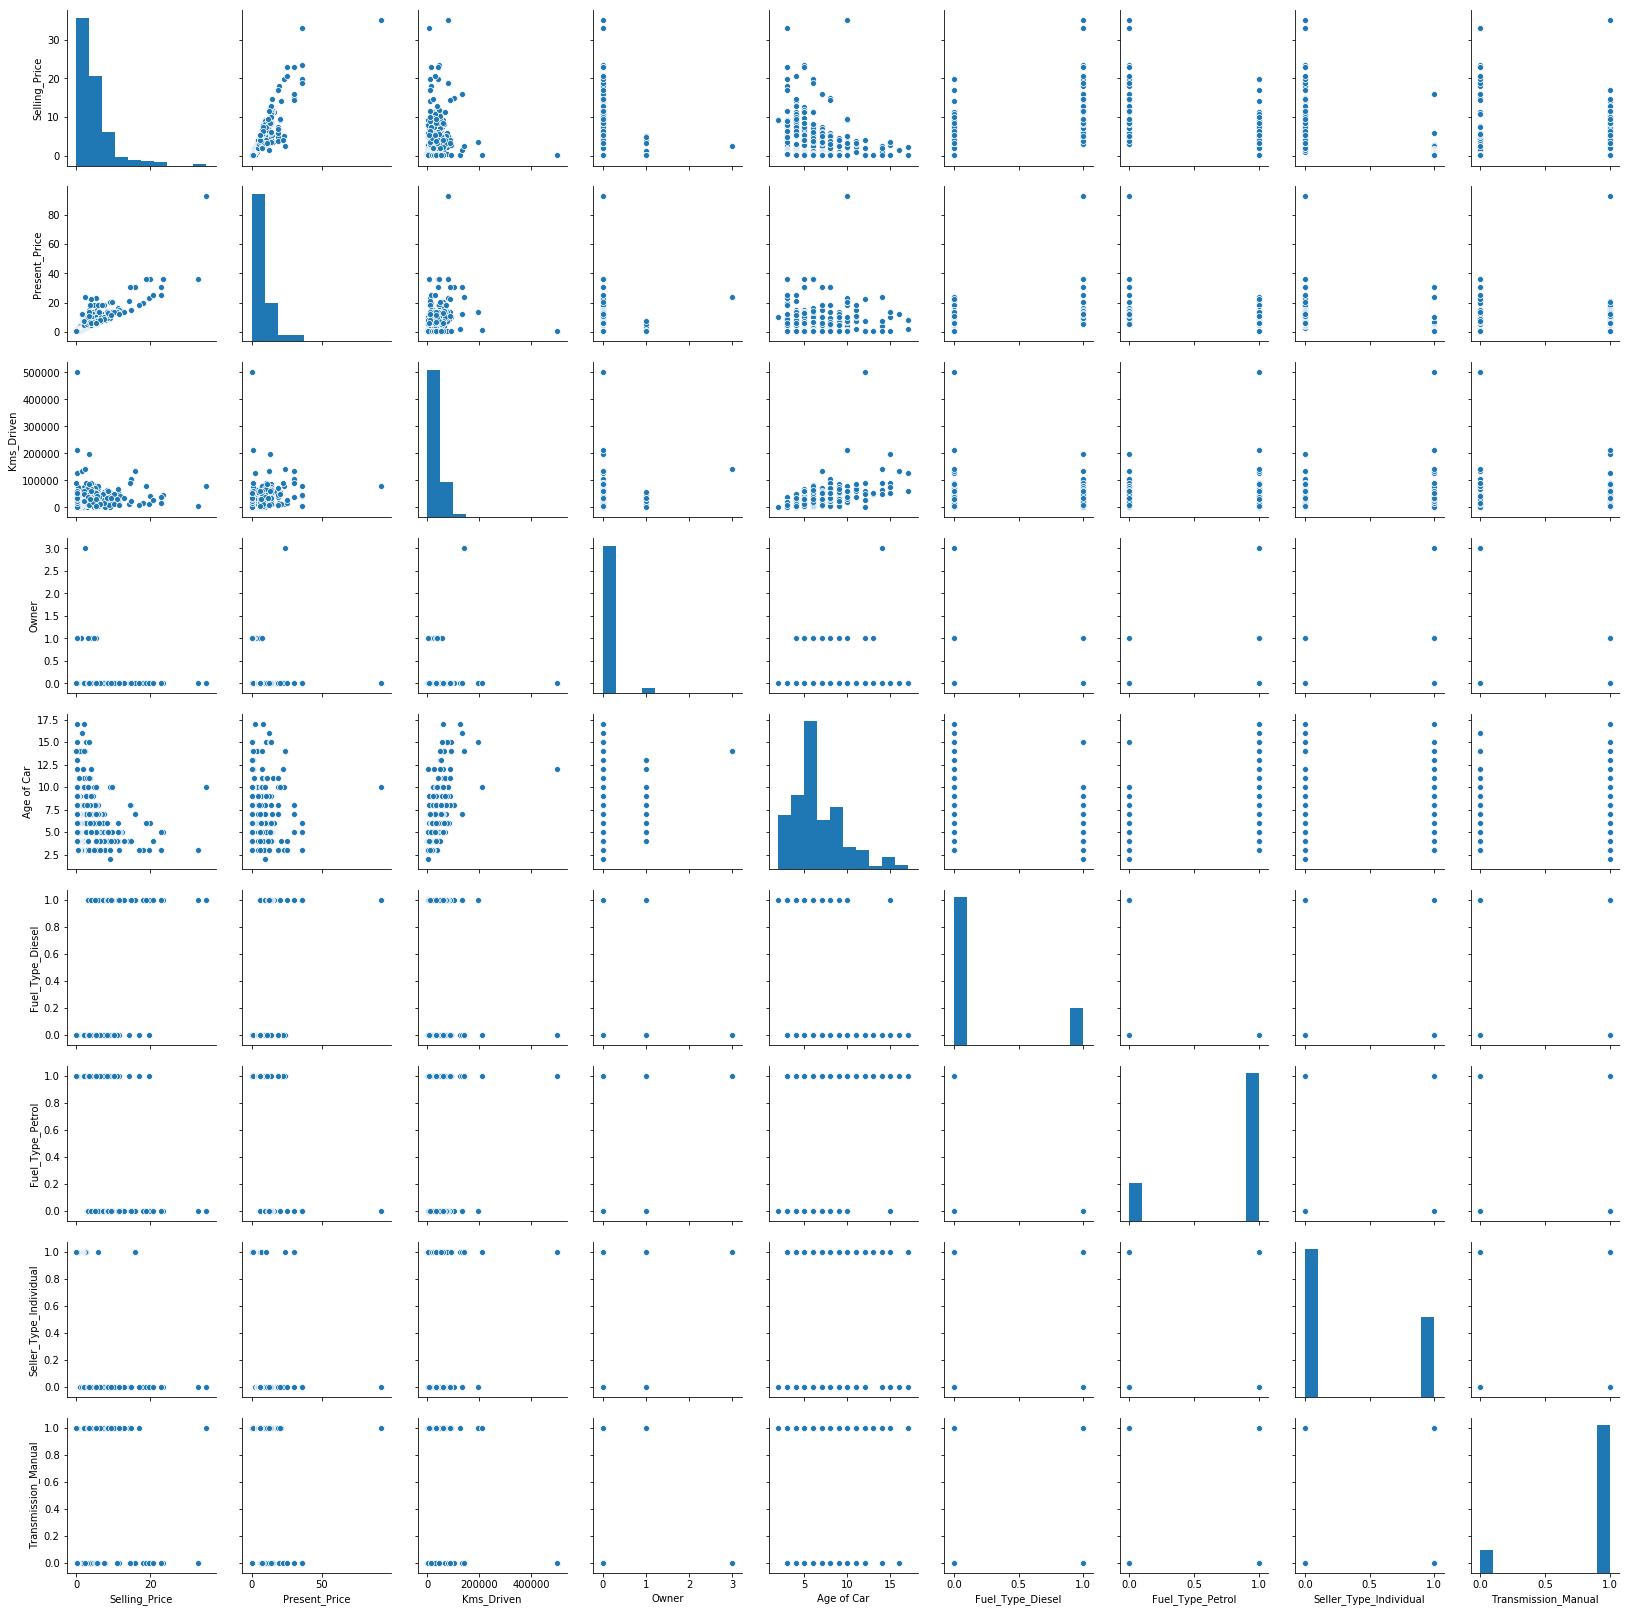

In [28]:
import seaborn as sns
sns.pairplot(cardata)

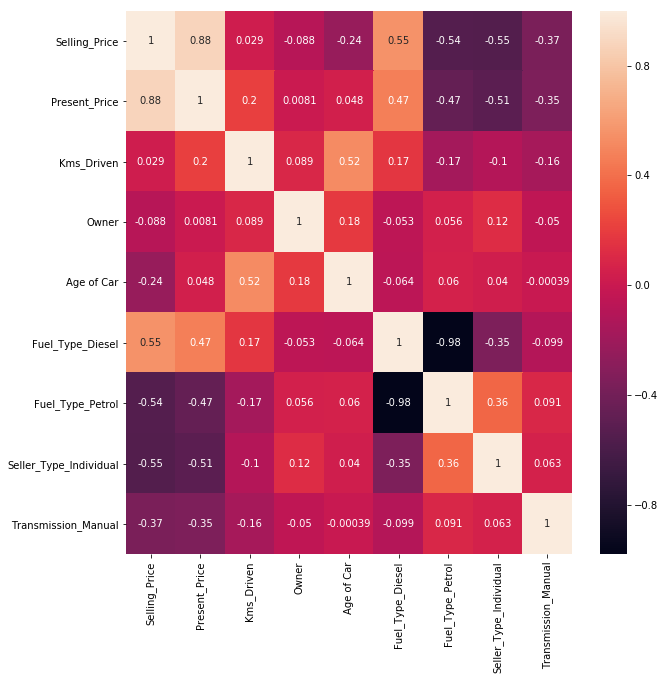

In [31]:
import matplotlib.pyplot as plt
corr=cardata.corr()
corr_features=corr.index
plt.figure(figsize=(10,10))
g=sns.heatmap(cardata[corr_features].corr(),annot=True)

In [33]:
X=cardata.iloc[:,1:]
y=cardata.iloc[:,0]

,Present_Price,Kms_Driven,Owner,Age of Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [34]:
from sklearn.ensemble import ExtraTreesRegressor
ext=ExtraTreesRegressor()
ext.fit(X,y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [35]:
print(ext.feature_importances_)

[0.3602038  0.0365831  0.00037113 0.07179437 0.22784795 0.01974251
 0.13601783 0.14743932]


In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [42]:
from sklearn.ensemble import RandomForestRegressor
random=RandomForestRegressor()

In [43]:
#Randomised Search CV
n_estimators=[int(x) for x in np.linspace(start=100,stop=2000,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]


In [44]:
from sklearn.model_selection import RandomizedSearchCV
random_grid={'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf
}


In [45]:
rf_random=RandomizedSearchCV(estimator=random,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,n_jobs=1)

In [46]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1481, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1481, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   2.9s
[CV] n_estimators=1481, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV]  n_estimators=1481, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   2.8s
[CV] n_estimators=1481, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1481, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   2.9s
[CV] n_estimators=1481, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1481, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   2.8s
[CV] n_estimators=1481, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1481, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   2.8s
[CV] n_estimators=1136, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1136, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=1136, min_samples_spl

[CV]  n_estimators=1136, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, total=   1.7s
[CV] n_estimators=1136, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=1136, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, total=   1.8s
[CV] n_estimators=1136, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=1136, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, total=   1.7s
[CV] n_estimators=1136, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=1136, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, total=   1.8s
[CV] n_estimators=1136, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=1136, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, total=   1.7s
[CV] n_estimators=790, min_samples

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [100, 272, 445, 618, 790, 963, 1136, 1309, 1481, 1654, 1827, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

[ 8.05621877  0.96837441  4.42680396  2.47836034  0.72488071  3.07498087
  0.31166779 20.86131668  0.75892715  6.58896691  0.50318274  5.57334909
 12.20546928 11.0084605   4.22772322  7.56018231  7.50491897  4.53219109
  0.91490378  5.12193788  0.38764461  4.1502352   8.89234301  4.54625253
  7.65974679  8.14703579  0.26961512  5.3563707   6.5449156   4.94700387
  8.44562458  8.97886563  2.87039838  7.30198515  3.67529372  6.51918363
  4.99417286  7.82408283  1.40093405  0.52560432  3.94646547  5.59039163
  0.46513662  3.15601958  0.3833052   0.57387576  0.52158226  0.43801643
  0.49155713  0.86930115  2.83822417  1.2752594   0.97583896  3.11540176
  7.54358542  0.65544846  1.09245566  5.78596219  1.91178933  3.75057153
  4.27791077 10.08622552  5.67049436  4.03446707  0.95371371  5.40187711
  4.20234976  5.1709318   0.60575625  0.64693     5.48603815  0.57432478
  8.07290344  6.76066847  3.47430115  4.51250506  6.99939905  4.98482782
  0.4527549   0.66321404  0.61386965  0.84056718  0

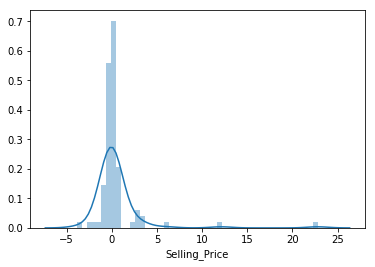

In [48]:
predictions=rf_random.predict(X_test)
print(predictions)
sns.distplot(y_test-predictions)

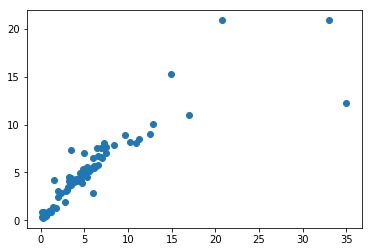

In [50]:
plt.scatter(y_test,predictions)